In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn import svm
import os
#import matplotlib.pyplot as plt
from skimage.transform import resize   #to resize image
from skimage.io import imread          #to read image
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
os.listdir('/content/drive/MyDrive/mask_data')

['with_mask', 'without_mask']

In [ ]:
flat_data_arr = []
target_arr = []
Categories =['with_mask','without_mask']
datadir = '/content/drive/MyDrive/mask_data'

In [ ]:
for i in Categories:
  print("loading... category :",i)
  path=os.path.join(datadir,i)
  for img in os.listdir(path)[0:100]:
    img_array=imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print("loaded category:",i,"successfully")


loading... category : with_mask
loaded category: with_mask successfully
loading... category : without_mask
loaded category: without_mask successfully


In [ ]:
flat_data =np.array(flat_data_arr) 
target = np.array(target_arr)
df = pd.DataFrame(flat_data)
df

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.695529,0.719058,0.703372,0.737111,0.757072,0.741386,0.744159,0.763556,0.742500,0.765292,...,0.873529,0.852850,0.833242,0.863675,0.848209,0.828601,0.852131,0.848209,0.828601,0.852131
1,0.849908,0.691381,0.524196,0.853828,0.688235,0.523749,0.854902,0.682758,0.520458,0.856458,...,0.324196,0.557884,0.293375,0.321414,0.574322,0.277028,0.314911,0.577807,0.259791,0.305184
2,0.796078,0.847059,0.921569,0.796078,0.847059,0.921569,0.796078,0.847059,0.921569,0.796078,...,0.479511,0.371268,0.398719,0.528131,0.390620,0.429307,0.566562,0.413869,0.455686,0.592941
3,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.987708,0.987708,0.987708,0.988513,...,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.816706,0.887007,0.824261,0.791268,0.843974,0.777307,0.723190,0.743190,0.686568,0.584837,...,0.843582,0.980392,0.921569,0.847059,0.980392,0.921569,0.847405,0.980392,0.921569,0.847059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.960784,0.945098,0.909804,0.962510,0.946824,0.911529,0.964706,0.949020,0.913725,0.964810,...,0.834980,0.953203,0.925752,0.851242,0.949333,0.926275,0.851765,0.933908,0.914301,0.839791
196,0.654902,0.701961,0.749020,0.654902,0.701961,0.749020,0.654902,0.701961,0.749020,0.654902,...,0.736582,0.788915,0.729593,0.733356,0.814693,0.754224,0.756967,0.838092,0.788784,0.788784
197,0.862745,0.839216,0.784314,0.862675,0.839146,0.784314,0.859651,0.836121,0.781242,0.858824,...,0.544188,0.810405,0.596618,0.621542,0.866414,0.694910,0.705451,0.890242,0.740674,0.742903
198,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.936909,0.996078,0.992157,0.945569,0.995229,0.990459,0.943021,0.989983,0.986711,0.937399


In [ ]:
df['Target']=target

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=77)

In [ ]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.85


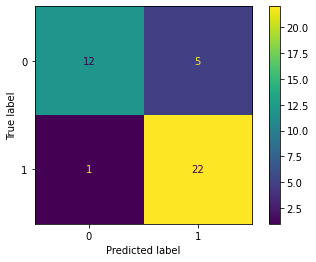

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
path='/content/drive/MyDrive/withmask.jpeg'
img=imread(path)
img=resize(img,(150,150,3)).flatten().reshape(1,-1)
clf.predict(img)

array([1])

In [ ]:
path='/content/drive/MyDrive/withoutmask.jpg'
img=imread(path)
img=resize(img,(150,150,3)).flatten().reshape(1,-1)
clf.predict(img)

array([1])